# NDVI Climatology

* **Products used:** 
[ndvi_climatology_ls](https://explorer.digitalearth.africa/products/ndvi_climatology_ls)

## Background

Climatology refers to conditions averaged over a long period of time, typically greater than 30 years. The Digital Earth Africa NDVI Climatology product represents the long-term average baseline condition of vegetation for every Landsat pixel over the African continent. Both mean and standard deviation NDVI climatologies are available for each calender month. The product was calculated on the period 1984-2020. NDVI climatologies may be used for many applications including identifying extremeties (anomalies) in vegetation condition, indentifying both long and short-term changes in vegetation condition, and as an input into machine learning processes for land use classification.

Further details on the calculation of the product are available in the [NDVI Climatology technical specifications](https://docs.digitalearthafrica.org/en/latest/data_specs/NDVI_Climatology_specs.html) documentation.

**Important details:**

* Datacube product names: `ndvi_climatology_ls`
* Measurements
    * `mean_<month>`: These measurements show the mean NDVI calculated from all available NDVI data from 1984-2020 for the given month.

    * `stddev_<month>`: These measurements show the standard deviation of NDVI values of all available NDVI data from 1984-2020 for the given month.

    * `count_<month>`: These measaurements show the number of clear observations that go into creating the mean and standard deviation measurements. Importantly, caution should be used when applying this product to regions where the clear observation count is less than approximately 30. This can often be the case over equatorial Africa due to frequent cloud cover and inconsistent coverage of Landsat-5. 
* Status: Operational
* Date-range: The time dimension represents calendar months aggregated across the period 1984-2020.
* Spatial resolution: 30m

## Description

In this notebook we will load the NDVI Climatology product using `dc.load()` to return mean, standard deviation, and clear observation count for each calendar month.

Topics covered include:
1. Inspecting the NDVI Climatology product and measurements available in the datacube.
2. Using the native `dc.load()` function to load in NDVI Climatology.
3. Inspect perennial and annual vegtation using NDVI mean and standard deviation.

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages

In [1]:
import datacube
import numpy as np
import matplotlib.pyplot as plt

from deafrica_tools.plotting import display_map

### Connect to the datacube

In [2]:
dc = datacube.Datacube(app='NDVI_clim')

## Available measurements

### List measurements


In [3]:
product_name = 'ndvi_climatology_ls'

dc_measurements = dc.list_measurements()
dc_measurements.loc[product_name].drop('flags_definition', axis=1)

,name,dtype,units,nodata,aliases
measurement,,,,,
mean_jan,mean_jan,float32,1,NaN,"[MEAN_JAN, mean_january]"
mean_feb,mean_feb,float32,1,NaN,"[MEAN_FEB, mean_february]"
mean_mar,mean_mar,float32,1,NaN,"[MEAN_MAR, mean_march]"
mean_apr,mean_apr,float32,1,NaN,"[MEAN_APR, mean_april]"
mean_may,mean_may,float32,1,NaN,[MEAN_MAY]
mean_jun,mean_jun,float32,1,NaN,"[MEAN_JUN, mean_june]"
mean_jul,mean_jul,float32,1,NaN,"[MEAN_JUL, mean_july]"
mean_aug,mean_aug,float32,1,NaN,"[MEAN_AUG, mean_august]"
mean_sep,mean_sep,float32,1,NaN,"[MEAN_SEP, mean_september]"


### Analysis parameters

This section defines the analysis parameters, including:

* `lat, lon, buffer`: center lat/lon and analysis window size for the area of interest
* `resolution`: the pixel resolution to use for loading the `ndvi_climatology_ls`. The native resolution of the product is 30 metres i.e. `(-30,30)` as the product is Landsat derived.

The default location is an irrigation scheme along a river in Tanzania.

In [4]:
lat, lon = -7.655, 35.576

buffer = 0.01

resolution=(-30, 30)

#join lat, lon, buffer to get bounding box
lon_range = (lon - buffer, lon + buffer)
lat_range = (lat + buffer, lat - buffer)

## View the selected location

The next cell will display the selected area on an interactive map. Feel free to zoom in and out to get a better understanding of the area you'll be analysing. Clicking on any point of the map will reveal the latitude and longitude coordinates of that point.

In [5]:
display_map(lon_range, lat_range)

## Load data

### Store measurements

As this dataset has a lot of measurements, it is easier to store them in a list and access them as we need when loading, rather than typing out each measurement in a `dc.load()` query.

In [6]:
ndvi_clim_measurements = dc_measurements.loc[product_name].drop('flags_definition', axis=1)

ndvi_clim_measurements = list(ndvi_clim_measurements.index)

In [7]:
# load data
ndvi_mean = dc.load(product="ndvi_climatology_ls",
             measurements = ndvi_clim_measurements[0:12],
             resolution = resolution,
             x= lon_range,
             y= lat_range)

ndvi_std = dc.load(product="ndvi_climatology_ls",
             measurements = ndvi_clim_measurements[12:24],
             resolution = resolution,
             x= lon_range,
             y= lat_range)


print(ndvi_mean)
print(ndvi_std)

<xarray.Dataset>
Dimensions:      (time: 1, y: 85, x: 65)
Coordinates:
  * time         (time) datetime64[ns] 2002-07-02T11:59:59.999999
  * y            (y) float64 -9.725e+05 -9.725e+05 ... -9.75e+05 -9.75e+05
  * x            (x) float64 3.432e+06 3.432e+06 ... 3.434e+06 3.434e+06
    spatial_ref  int32 6933
Data variables:
    mean_jan     (time, y, x) float32 0.515 0.5459 0.5188 ... 0.5813 0.5668
    mean_feb     (time, y, x) float32 0.5604 0.5726 0.5538 ... 0.6718 0.67
    mean_mar     (time, y, x) float32 0.655 0.6692 0.6383 ... 0.7158 0.7004
    mean_apr     (time, y, x) float32 0.6212 0.6335 0.6084 ... 0.7045 0.6762
    mean_may     (time, y, x) float32 0.577 0.5775 0.5588 ... 0.6031 0.5908
    mean_jun     (time, y, x) float32 0.3602 0.3572 0.3476 ... 0.3955 0.3991
    mean_jul     (time, y, x) float32 0.2793 0.2767 0.2718 ... 0.2954 0.2968
    mean_aug     (time, y, x) float32 0.2423 0.2386 0.2335 ... 0.2392 0.2362
    mean_sep     (time, y, x) float32 0.2199 0.2136 0.2073 .

## Plot NDVI mean for each month

The plots below shows reasonably uniform and green long-term average vegetation condition across the area from January to June, when things start to dry out and green vegetation appears closer to water courses. We can visually differentiate between the irrigation scheme and surrounding landscape by looking at NDVI in September, October, and November; though it isn't really well-defined.

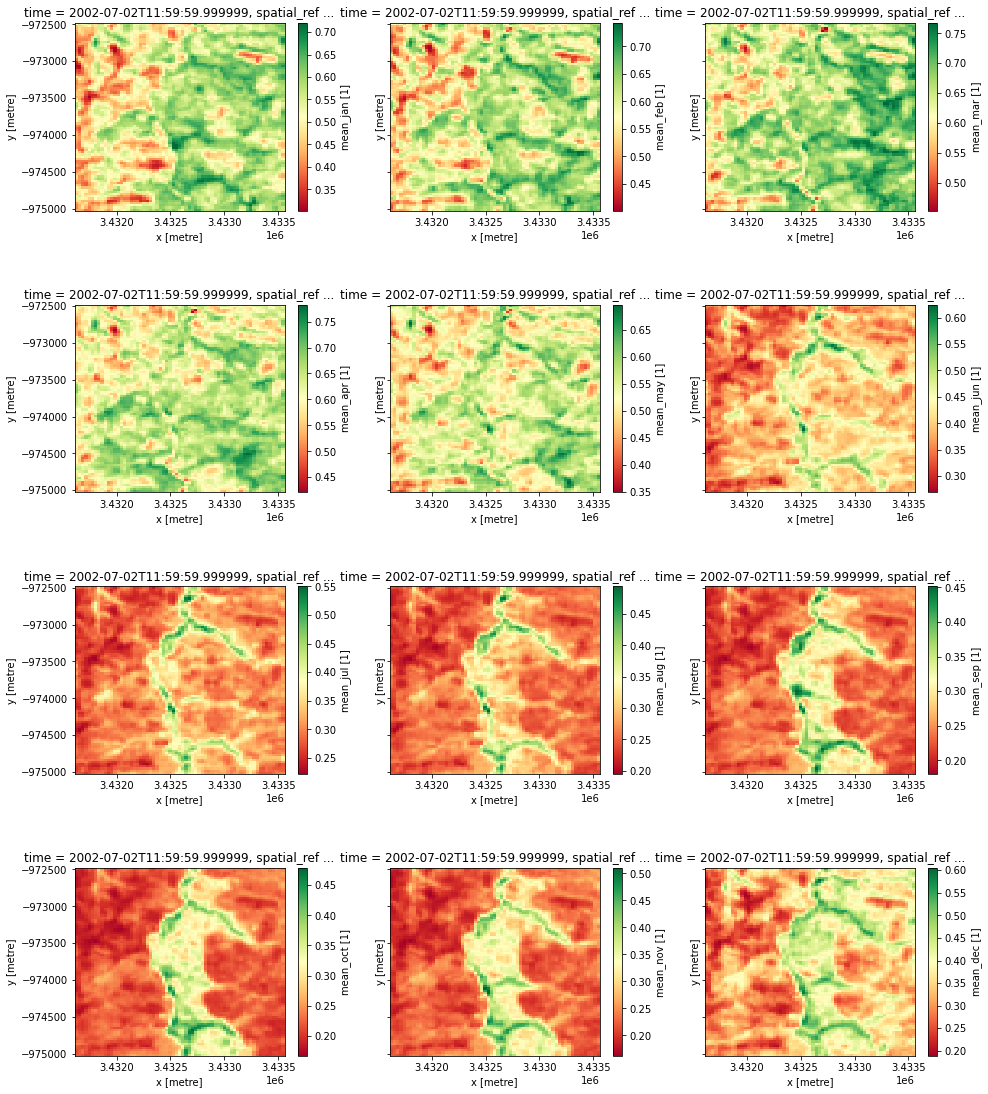

In [8]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16, 19), sharey= True)
plt.subplots_adjust(hspace=0.5)

for x, ax in zip(ndvi_clim_measurements[0:12], axs.ravel()):
    ndvi_mean[x].plot(cmap="RdYlGn", ax=ax)

plt.show();

## Plot NDVI standard deviation for each month

The plots below shows similar spatial patterns to the mean NDVI for January to July. However, visual inspection of the months August, September, and October show that standard deviation is much higher in the irrigation scheme than surrounding landscapes. This could inform a method to classify irrigated area, such as simple thresholding or more complex machine learning.

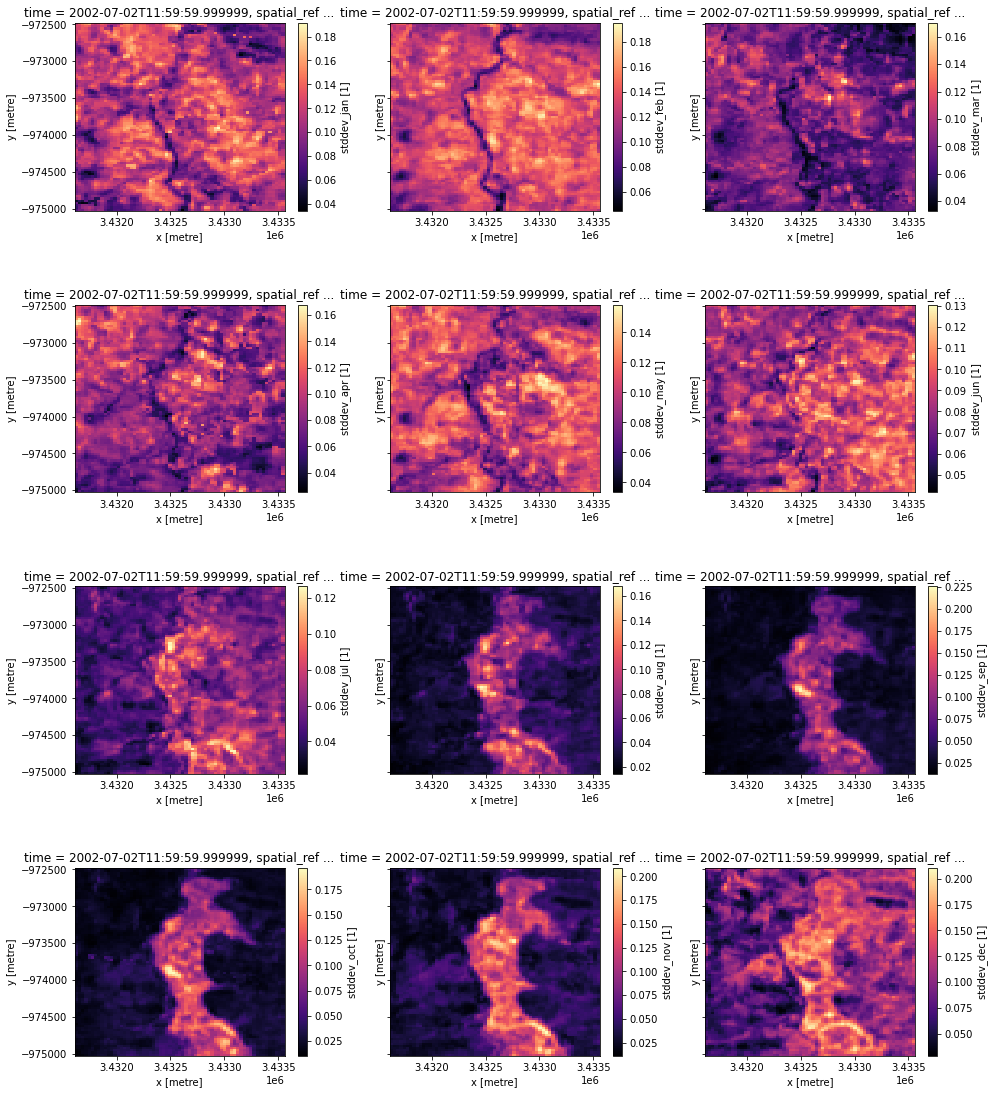

In [9]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16, 19), sharey= True)
plt.subplots_adjust(hspace=0.5)

for x, ax in zip(ndvi_clim_measurements[12:24], axs.ravel()):
    ndvi_std[x].plot(cmap = "magma", ax=ax)

plt.show();

## Inspect crop phenology

We can use the NDVI climatology product to generate long-term average phenological patterns for specific regions, landscapes, or vegetation types. Limiting our analysis of the area above to a crop mask enables us to plot the long-term phenology of cropland.

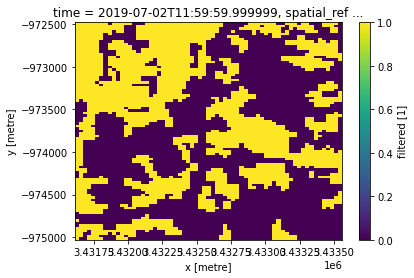

In [10]:
cm = dc.load(product="crop_mask_eastern",
             measurements='filtered',
            resampling='nearest', 
            like=ndvi_mean.geobox).filtered.squeeze()

cm.plot()

### Mask NDVI Climatology to cropland and plot phenology

In [11]:
phenology_mean=ndvi_mean.where(cm, np.nan).mean(['x','y']).to_array()
phenology_std=ndvi_std.where(cm, np.nan).mean(['x','y']).to_array()

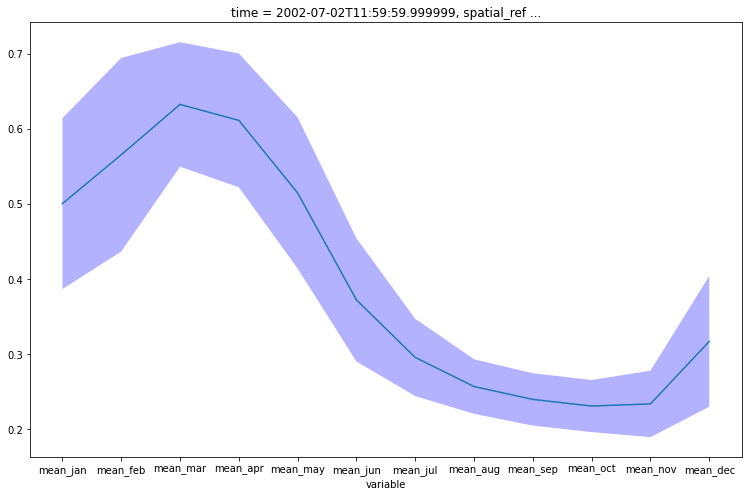

In [12]:
phenology_mean.plot(size=7)
plt.fill_between(np.arange(0,12), np.array(phenology_mean).flatten() + np.array(phenology_std).flatten(),
                 np.array(phenology_mean).flatten() - np.array(phenology_std).flatten(), facecolor='blue', alpha=0.3)
plt.tight_layout()

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:** 

In [13]:
print(datacube.__version__)

1.8.6


**Last Tested:**

In [14]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2022-02-17'